In [38]:
import pandas as pd
import re
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def get_avg_utility_staleness_vs_rounds(filename):
    aggregation_pattern = r".*aggregation finished for round (\d+).*"
    send_pattern = r".*Last Eval Round: (\d+),.*"


    combined_pattern = f"{aggregation_pattern}|{send_pattern}"

    filtered_logs = []
    with open(filename, 'r') as file:
        for line in file:
            if re.search(combined_pattern, line):
                filtered_logs.append(line)

    # Display the filtered logs
    print(len(filtered_logs))
    round_number =1 
    staleness = []
    round_stale = {}
    i=0
    for line in filtered_logs:
        i+=1
        if(i%10000==0):
            print(i)
        # print(line)
        if re.search(aggregation_pattern,line): 
            
            if(len(staleness)>0):    
                avg_staleness = sum(staleness)/len(staleness)
                round_stale[round_number] = avg_staleness

            round_number = int(re.search(aggregation_pattern,line).group(1))+1   
            staleness = []
            
        if re.search(send_pattern, line):
            match = re.search(send_pattern, line)
            # # trainer_id = match.group(1)
            # if match.group(1) is not None:
            last_util = int(match.group(1))
            stale = round_number - last_util
            staleness.append(stale)
            # else:
            #     print(line)
    print(round_stale)
    return round_stale

    # return avg_utility_staleness_per_round




In [70]:
def plot(x1,y1,x2,y2):
    
    plt.rcParams.update({
    'axes.labelsize': 16,
    'axes.titlesize': 16,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'figure.figsize': [6, 4]
    })

    plt.plot(x1, y1, label='OORT', color = "lightcoral",  marker='o')
    plt.plot(x2, y2, label='FeLiX', color = "royalblue", marker='o')
    plt.xlabel("Rounds")
    plt.ylabel("Average Staleness")
    plt.legend(loc='upper left',fontsize=16)  # Move legend to top left

    # Setting x and y axis limits and intervals
    plt.xlim(0, 2000)
    plt.ylim(0, 1400)
    plt.xticks(range(0, 2001, 500))  # Interval of 500 on x-axis

    # plt.show()
    plt.tight_layout()
    plt.savefig("avg_staleness_per_round.pdf", format='pdf', bbox_inches='tight')

In [45]:
oort_agg_logs_alpha1 = 'filtered5_oort_alpha1.log'
# felix_agg_logs_alpha1 = 'filtered5_felix_alpha1.log'
oort_output = get_avg_utility_staleness_vs_rounds(oort_agg_logs_alpha1)
x_oort = list(oort_output.keys())
y_oort = list(oort_output.values())
# felix_output = get_avg_utility_staleness_vs_rounds(felix_agg_logs_alpha1)
# x_oort, y_oort = aggregate_values(oort_output)
# plot(x_oort, y_oort)
# x_felix, y_felix = aggregate_values(felix_output)
# x_oort = list(oort_output.keys())
# y_oort = list(oort_output.values())

77413
10000
20000
30000
40000
50000
60000
70000
{1: 0.0, 100: 26.935754189944134, 200: 74.17127496159755, 300: 141.7949685534591, 400: 217.66011904761905, 500: 289.824, 600: 362.94945054945055, 700: 443.5808743169399, 800: 468.2009523809524, 900: 544.3291079812207, 1000: 623.1191588785047, 1100: 692.3372093023256, 1200: 747.0675925925926, 1300: 806.9416282642089, 1400: 882.6753712237584, 1500: 950.4686635944701, 1600: 1005.861365953109, 1700: 1075.4587155963302, 1800: 1129.8741080530071, 1900: 1195.2394723490613, 2000: 1218.0141414141415, 2100: 1257.352852852853, 2200: 1301.984126984127, 2300: 1329.446402349486, 2400: 1379.4769529354683, 2500: 1438.967772967773, 2600: 1486.960076960077, 2700: 1519.4243295019157, 2800: 1547.8652482269504, 2900: 1594.1295508274231, 3000: 1626.2241134751773, 3100: 1678.756973995272, 3200: 1729.696926713948, 3300: 1764.253164556962, 3400: 1833.5039849976558, 3500: 1880.4771241830065, 3600: 1922.68720821662, 3700: 1957.3734439834025, 3800: 2009.507346189164

In [46]:
felix_agg_logs_alpha1 = 'filtered5_felix_alpha1.log'
felix_output = get_avg_utility_staleness_vs_rounds(felix_agg_logs_alpha1)
x_felix = list(felix_output.keys())
y_felix = list(felix_output.values())

59719
10000
20000
30000
40000
50000
{1: 0.0, 100: 23.78137128072445, 200: 69.43105209397345, 300: 116.01498127340824, 400: 163.6776595744681, 500: 187.98676909944516, 600: 223.01605504587155, 700: 257.3537325243999, 800: 275.77555555555557, 900: 304.67202729044834, 1000: 329.0333951762523, 1100: 361.11691810344826, 1200: 387.04549356223174, 1300: 411.7169491525424, 1400: 425.33677685950414, 1500: 431.4127621597501, 1600: 453.3342151675485, 1700: 474.46201141853317, 1800: 494.64208984375, 1900: 524.6029829545455, 2000: 555.62841796875, 2100: 579.9134241245137, 2200: 606.920205920206, 2300: 629.1607066836951}


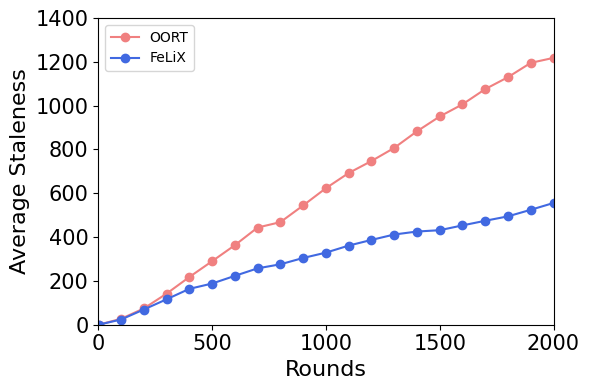

In [71]:
plot(x_oort,y_oort,x_felix,y_felix)

In [1]:
import re

# Define a list to store the x values
x_values = []

# Open the extracted log file
with open("evalSelectorLogs.log", "r") as file:
    for line in file:
        # Use a regex to extract the value of x
        match = re.search(r"Avg training time ([\d.]+) across", line)
        if match:
            # Add the extracted value of x to the list
            x_values.append(float(match.group(1)))

# Print the list of x values
print("Extracted x values:", x_values)


Extracted x values: [4.448523363636363, 10.090196000000002, 13.406552533333333, 15.780070124999998, 17.86896176470588, 19.94161522222222, 21.98911363157894, 23.39592655, 25.321063142857138, 27.28391614285714, 29.044618409090905, 30.76448426086956, 31.335187125, 34.782086875000005, 36.832502440000006, 38.69232292307692, 39.8041157037037, 41.63286757142858, 43.18506927586207, 44.96317840000001, 46.06291467741935, 49.87319180645161, 50.6120771212121, 52.86064520588234, 55.33602225714285, 57.03901033333333, 60.28775051351352, 63.35029518421054, 65.8704171282051, 68.36021265, 72.97489142500002, 73.6688779761905, 76.39806567441862, 79.48248238636364, 81.62545182222222, 84.03679758695652, 86.63424248936171, 88.7677912916667, 91.26789369387758, 94.18930134000004, 94.43375213461543, 98.26016263461543, 98.37563996296298, 100.37551134545456, 102.30907308928569, 103.80962173684208, 105.42278531034482, 107.07384255932205, 106.68780496721313, 110.09802932786889, 110.02020263492065, 111.6007947656250

In [2]:
x2_values = []

# Open the extracted log file
with open("nonEvalSelectorLogs.log", "r") as file:
    for line in file:
        # Use a regex to extract the value of x
        match = re.search(r"Avg training time ([\d.]+) across", line)
        if match:
            # Add the extracted value of x to the list
            x2_values.append(float(match.group(1)))

# Print the list of x values
print("Extracted x values:", x2_values)


Extracted x values: [4.722587636363636, 8.159915923076923, 11.318990785714286, 13.886182733333333, 15.25258241176471, 17.042338666666662, 18.64809942105263, 21.83262005263158, 22.909689599999997, 23.92059219047619, 25.760962045454548, 27.72785786363637, 28.934554913043474, 29.850056416666664, 31.290516559999997, 34.13897136, 34.967993769230766, 35.98686488888888, 38.072333444444446, 38.52511482142858, 39.44775724137931, 41.944540344827594, 42.68345313333332, 43.66299535483871, 46.32526116129034, 47.09089603125, 48.209929090909085, 50.24312436363637, 51.054918441176476, 51.6758696, 53.87472891428572, 54.366187388888896, 55.403907567567565, 57.381222540540534, 57.79093218421053, 58.37547887179489, 60.008057820512825, 60.4761002, 60.4586816097561, 62.44244707317073, 62.67951516666666, 63.361784139534876, 65.26071544186047, 65.49143118181817, 65.69722302222222, 67.41427328888888, 67.36630256521738, 67.66910568085103, 69.02974212765955, 69.14434485416665, 69.48951579591835, 71.3071338571428

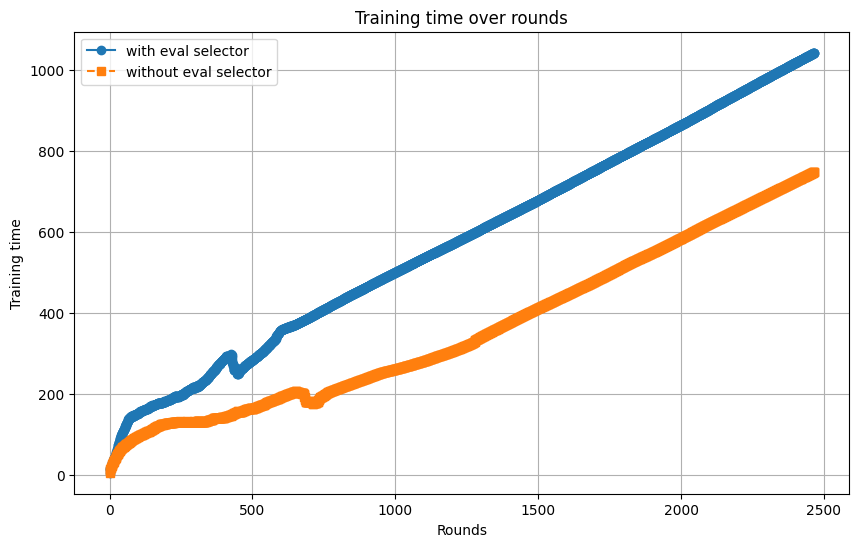

In [6]:
import matplotlib.pyplot as plt
x2_values = x2_values[0:2467]
# Sample data for demonstration
# x_values = [2.34, 3.67, 1.89, 2.56]
# x2_values = [2.5, 3.5, 1.8, 2.7]

# X-axis values (assuming equal intervals)
time_points = range(len(x_values))  # [0, 1, 2, ...]

# Plotting the graphs
plt.figure(figsize=(10, 6))

# Line for x_values
plt.plot(time_points, x_values, label='with eval selector', marker='o', linestyle='-')

# Line for x2_values
plt.plot(time_points, x2_values, label='without eval selector', marker='s', linestyle='--')

# Adding labels, title, and legend
plt.xlabel('Rounds')
plt.ylabel('Training time')
plt.title('Training time over rounds')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [52]:
import re
from datetime import datetime
import matplotlib.pyplot as plt
def check_selector(selector_log_file):
    send_ts_selector = []
    receive_ts_selector = []
    with open(selector_log_file, "r") as file:
        for line in file:
            match = re.match(r"(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3})", line)
            ts = datetime.strptime(match.group(1), "%Y-%m-%d %H:%M:%S,%f")
            if re.match(r".*send*", line):
                send_ts_selector.append(ts)
            else:
                receive_ts_selector.append(ts)
    return send_ts_selector, receive_ts_selector

def check_trainer(trainer_log_file):
    send_ts_trainer = []
    receive_ts_trainer = []
    with open(trainer_log_file, "r") as file:
        for line in file:

            match = re.match(r"(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3})", line)
            ts = datetime.strptime(match.group(1), "%Y-%m-%d %H:%M:%S,%f")
            if re.match(r".*send*", line):
                send_ts_trainer.append(ts)
            else:
                receive_ts_trainer.append(ts)
    return send_ts_trainer, receive_ts_trainer


def check(selector_log_file, trainer_log_file):
    send_ts_trainer, receive_ts_trainer = check_trainer(trainer_log_file)
    send_ts_selector, receive_ts_selector = check_selector(selector_log_file)
    # print(len(send_ts_trainer) == len(receive_ts_selector))
    # print(f"trainer sent {len(send_ts_trainer)}")
    # print(f"selector recvd {len(receive_ts_selector)}")
    # print(len(receive_ts_trainer)==len(send_ts_selector))
    # print(f"selector sent {len(send_ts_selector)}")
    # print(f"trainer recvd {len(receive_ts_trainer)}")

    trainer_to_selector = []
    for i in range(len(send_ts_trainer)):
        trainer_to_selector.append((receive_ts_selector[i]-send_ts_trainer[i]).total_seconds())

    selector_to_trainer = []
    for i in range(len(send_ts_selector)):
        selector_to_trainer.append((receive_ts_trainer[i]-send_ts_selector[i]).total_seconds())
    return trainer_to_selector, selector_to_trainer

def plot(y1,y2, title):
    x = list(range(min(len(y1), len(y2))))

    # Trim y1 and y2 to match the x length (optional for safety)
    y1 = y1[:len(x)]
    y2 = y2[:len(x)]

    # Plot the two lines
    plt.plot(x, y1, label='Eval Selector', marker='o')  # Line 1
    plt.plot(x, y2, label='Non eval selector', marker='s')  # Line 2

    # Add labels, title, and legend
    plt.xlabel('Calls')
    plt.ylabel('Time gap')
    plt.title(title)
    plt.legend()

    # Display grid
    plt.grid(True)

    # Show the plot
    plt.show()

    

        

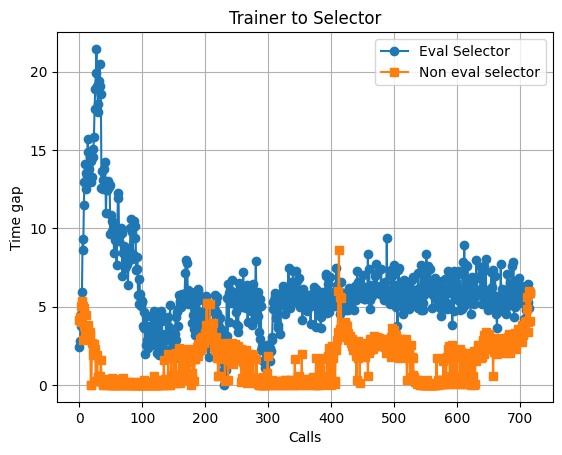

In [53]:
evalSelector = "evalSelectorLogs.log"
evalTrainer = "/home/dgarg39/flame/lib/python/examples/async_cifar10/trainer/config_dir1_num300_traceFail_6d_3state_oort/evalTrainerLogs.log"

eval_trainer_to_selector, eval_selector_to_trainer = check(evalSelector, evalTrainer)



nonEvalSelector = "nonEvalSelectorLogs.log"
nonEvalTrainer = "/home/dgarg39/flame/lib/python/examples/async_cifar10/trainer/config_dir1_num300_traceFail_6d_3state_oort/nonEvalTrainerLogs.log"

non_eval_trainer_to_selector, non_eval_selector_to_trainer = check(nonEvalSelector, nonEvalTrainer)
# print(eval_trainer_to_selector)
# print(non_eval_trainer_to_selector)
# print(eval_selector_to_trainer)
# print(non_eval_selector_to_trainer)
plot(eval_trainer_to_selector, non_eval_trainer_to_selector, "Trainer to Selector")

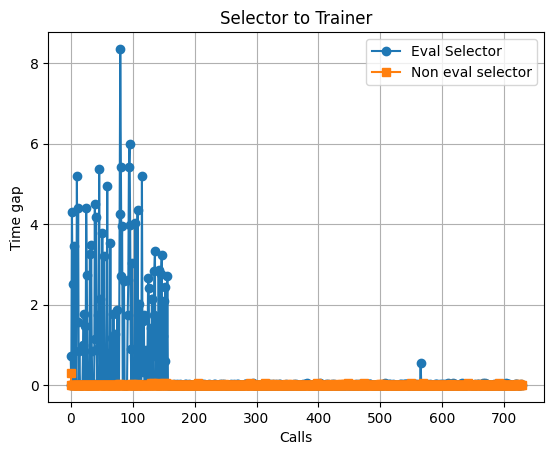

In [54]:
plot(eval_selector_to_trainer, non_eval_selector_to_trainer, "Selector to Trainer")

In [8]:
# temp = {
#     '505f9fc483cf4df68a2409257b5fad7d3c580370': 544, '505f9fc483cf4df68a2409257b5fad7d3c580371': 10, '505f9fc483cf4df68a2409257b5fad7d3c580372': 170, '505f9fc483cf4df68a2409257b5fad7d3c580373': 17, '505f9fc483cf4df68a2409257b5fad7d3c580375': 19, '505f9fc483cf4df68a2409257b5fad7d3c580374': 10, '505f9fc483cf4df68a2409257b5fad7d3c580376': 415, '505f9fc483cf4df68a2409257b5fad7d3c580377': 330, '505f9fc483cf4df68a2409257b5fad7d3c580379': 16, '505f9fc483cf4df68a2409257b5fad7d3c580378': 15, '505f9fc483cf4df68a2409257b5fad7d3c580380': 26, '505f9fc483cf4df68a2409257b5fad7d3c580381': 11, '505f9fc483cf4df68a2409257b5fad7d3c580382': 16, '505f9fc483cf4df68a2409257b5fad7d3c580383': 27, '505f9fc483cf4df68a2409257b5fad7d3c580384': 182, '505f9fc483cf4df68a2409257b5fad7d3c580385': 13, '505f9fc483cf4df68a2409257b5fad7d3c580386': 655, '505f9fc483cf4df68a2409257b5fad7d3c580387': 63, '505f9fc483cf4df68a2409257b5fad7d3c580388': 28, '505f9fc483cf4df68a2409257b5fad7d3c580390': 231, '505f9fc483cf4df68a2409257b5fad7d3c580391': 140, '505f9fc483cf4df68a2409257b5fad7d3c580389': 5, '505f9fc483cf4df68a2409257b5fad7d3c580393': 14, '505f9fc483cf4df68a2409257b5fad7d3c580392': 10, '505f9fc483cf4df68a2409257b5fad7d3c580395': 783, '505f9fc483cf4df68a2409257b5fad7d3c580394': 12, '505f9fc483cf4df68a2409257b5fad7d3c580396': 916, '505f9fc483cf4df68a2409257b5fad7d3c580397': 15, '505f9fc483cf4df68a2409257b5fad7d3c580398': 358, '505f9fc483cf4df68a2409257b5fad7d3c580399': 168, '505f9fc483cf4df68a2409257b5fad7d3c580400': 235, '505f9fc483cf4df68a2409257b5fad7d3c580401': 618, '505f9fc483cf4df68a2409257b5fad7d3c580402': 390, '505f9fc483cf4df68a2409257b5fad7d3c580404': 15, '505f9fc483cf4df68a2409257b5fad7d3c580403': 9, '505f9fc483cf4df68a2409257b5fad7d3c580405': 23, '505f9fc483cf4df68a2409257b5fad7d3c580406': 173, '505f9fc483cf4df68a2409257b5fad7d3c580407': 96, '505f9fc483cf4df68a2409257b5fad7d3c580409': 299, '505f9fc483cf4df68a2409257b5fad7d3c580408': 10, '505f9fc483cf4df68a2409257b5fad7d3c580410': 9, '505f9fc483cf4df68a2409257b5fad7d3c580411': 944, '505f9fc483cf4df68a2409257b5fad7d3c580412': 22, '505f9fc483cf4df68a2409257b5fad7d3c580413': 427, '505f9fc483cf4df68a2409257b5fad7d3c580414': 11, '505f9fc483cf4df68a2409257b5fad7d3c580416': 19, '505f9fc483cf4df68a2409257b5fad7d3c580415': 217, '505f9fc483cf4df68a2409257b5fad7d3c580417': 16, '505f9fc483cf4df68a2409257b5fad7d3c580418': 94, '505f9fc483cf4df68a2409257b5fad7d3c580419': 13, '505f9fc483cf4df68a2409257b5fad7d3c580420': 17, '505f9fc483cf4df68a2409257b5fad7d3c580421': 11, '505f9fc483cf4df68a2409257b5fad7d3c580422': 11, '505f9fc483cf4df68a2409257b5fad7d3c580423': 18, '505f9fc483cf4df68a2409257b5fad7d3c580424': 11, '505f9fc483cf4df68a2409257b5fad7d3c580425': 9, '505f9fc483cf4df68a2409257b5fad7d3c580426': 17, '505f9fc483cf4df68a2409257b5fad7d3c580427': 8, '505f9fc483cf4df68a2409257b5fad7d3c580429': 12, '505f9fc483cf4df68a2409257b5fad7d3c580430': 15, '505f9fc483cf4df68a2409257b5fad7d3c580428': 8, '505f9fc483cf4df68a2409257b5fad7d3c580431': 19, '505f9fc483cf4df68a2409257b5fad7d3c580432': 13, '505f9fc483cf4df68a2409257b5fad7d3c580434': 19, '505f9fc483cf4df68a2409257b5fad7d3c580433': 112, 
#     '505f9fc483cf4df68a2409257b5fad7d3c580436': 362, '505f9fc483cf4df68a2409257b5fad7d3c580435': 8, '505f9fc483cf4df68a2409257b5fad7d3c580437': 167, '505f9fc483cf4df68a2409257b5fad7d3c580438': 173, '505f9fc483cf4df68a2409257b5fad7d3c580439': 15, '505f9fc483cf4df68a2409257b5fad7d3c580440': 15, '505f9fc483cf4df68a2409257b5fad7d3c580441': 464, '505f9fc483cf4df68a2409257b5fad7d3c580443': 504, '505f9fc483cf4df68a2409257b5fad7d3c580442': 79, '505f9fc483cf4df68a2409257b5fad7d3c580445': 462, '505f9fc483cf4df68a2409257b5fad7d3c580444': 7, '505f9fc483cf4df68a2409257b5fad7d3c580446': 13, '505f9fc483cf4df68a2409257b5fad7d3c580447': 8, '505f9fc483cf4df68a2409257b5fad7d3c580449': 15, '505f9fc483cf4df68a2409257b5fad7d3c580448': 699, '505f9fc483cf4df68a2409257b5fad7d3c580451': 481, '505f9fc483cf4df68a2409257b5fad7d3c580450': 281, '505f9fc483cf4df68a2409257b5fad7d3c580452': 9, '505f9fc483cf4df68a2409257b5fad7d3c580453': 10, '505f9fc483cf4df68a2409257b5fad7d3c580455': 601, '505f9fc483cf4df68a2409257b5fad7d3c580454': 167, '505f9fc483cf4df68a2409257b5fad7d3c580456': 404, '505f9fc483cf4df68a2409257b5fad7d3c580457': 447, '505f9fc483cf4df68a2409257b5fad7d3c580458': 16, '505f9fc483cf4df68a2409257b5fad7d3c580459': 13, '505f9fc483cf4df68a2409257b5fad7d3c580461': 455, '505f9fc483cf4df68a2409257b5fad7d3c580460': 6, '505f9fc483cf4df68a2409257b5fad7d3c580463': 16, '505f9fc483cf4df68a2409257b5fad7d3c580462': 7, '505f9fc483cf4df68a2409257b5fad7d3c580464': 236, '505f9fc483cf4df68a2409257b5fad7d3c580465': 179, '505f9fc483cf4df68a2409257b5fad7d3c580466': 16, '505f9fc483cf4df68a2409257b5fad7d3c580467': 167, '505f9fc483cf4df68a2409257b5fad7d3c580468': 29, '505f9fc483cf4df68a2409257b5fad7d3c580470': 204, '505f9fc483cf4df68a2409257b5fad7d3c580469': 6, '505f9fc483cf4df68a2409257b5fad7d3c580472': 1006, '505f9fc483cf4df68a2409257b5fad7d3c580471': 8, '505f9fc483cf4df68a2409257b5fad7d3c580474': 16, '505f9fc483cf4df68a2409257b5fad7d3c580473': 215, '505f9fc483cf4df68a2409257b5fad7d3c580476': 11, '505f9fc483cf4df68a2409257b5fad7d3c580475': 33, '505f9fc483cf4df68a2409257b5fad7d3c580477': 13, '505f9fc483cf4df68a2409257b5fad7d3c580479': 12, '505f9fc483cf4df68a2409257b5fad7d3c580478': 146, '505f9fc483cf4df68a2409257b5fad7d3c580480': 12, '505f9fc483cf4df68a2409257b5fad7d3c580481': 120, '505f9fc483cf4df68a2409257b5fad7d3c580482': 8, '505f9fc483cf4df68a2409257b5fad7d3c580483': 11, '505f9fc483cf4df68a2409257b5fad7d3c580484': 14, '505f9fc483cf4df68a2409257b5fad7d3c580485': 177, '505f9fc483cf4df68a2409257b5fad7d3c580486': 12, '505f9fc483cf4df68a2409257b5fad7d3c580487': 326, '505f9fc483cf4df68a2409257b5fad7d3c580488': 15, '505f9fc483cf4df68a2409257b5fad7d3c580489': 10, '505f9fc483cf4df68a2409257b5fad7d3c580490': 352, '505f9fc483cf4df68a2409257b5fad7d3c580491': 184, '505f9fc483cf4df68a2409257b5fad7d3c580492': 247, '505f9fc483cf4df68a2409257b5fad7d3c580493': 587, '505f9fc483cf4df68a2409257b5fad7d3c580494': 551, '505f9fc483cf4df68a2409257b5fad7d3c580495': 51, '505f9fc483cf4df68a2409257b5fad7d3c580496': 15, '505f9fc483cf4df68a2409257b5fad7d3c580497': 8, '505f9fc483cf4df68a2409257b5fad7d3c580498': 6, '505f9fc483cf4df68a2409257b5fad7d3c580499': 6, '505f9fc483cf4df68a2409257b5fad7d3c580500': 561, '505f9fc483cf4df68a2409257b5fad7d3c580501': 7, '505f9fc483cf4df68a2409257b5fad7d3c580502': 465, '505f9fc483cf4df68a2409257b5fad7d3c580503': 7, '505f9fc483cf4df68a2409257b5fad7d3c580504': 205, '505f9fc483cf4df68a2409257b5fad7d3c580505': 6, '505f9fc483cf4df68a2409257b5fad7d3c580506': 4, '505f9fc483cf4df68a2409257b5fad7d3c580507': 97, '505f9fc483cf4df68a2409257b5fad7d3c580508': 8, '505f9fc483cf4df68a2409257b5fad7d3c580509': 707, '505f9fc483cf4df68a2409257b5fad7d3c580510': 3, '505f9fc483cf4df68a2409257b5fad7d3c580511': 162, '505f9fc483cf4df68a2409257b5fad7d3c580512': 53, '505f9fc483cf4df68a2409257b5fad7d3c580513': 37, '505f9fc483cf4df68a2409257b5fad7d3c580514': 6, '505f9fc483cf4df68a2409257b5fad7d3c580515': 4, '505f9fc483cf4df68a2409257b5fad7d3c580518': 240, '505f9fc483cf4df68a2409257b5fad7d3c580516': 1, '505f9fc483cf4df68a2409257b5fad7d3c580517': 68, '505f9fc483cf4df68a2409257b5fad7d3c580519': 25, '505f9fc483cf4df68a2409257b5fad7d3c580520': 1, '505f9fc483cf4df68a2409257b5fad7d3c580521': 2, '505f9fc483cf4df68a2409257b5fad7d3c580522': 489, '505f9fc483cf4df68a2409257b5fad7d3c580524': 686, 
#     '505f9fc483cf4df68a2409257b5fad7d3c580529': 210, '505f9fc483cf4df68a2409257b5fad7d3c580530': 14, '505f9fc483cf4df68a2409257b5fad7d3c580533': 195, '505f9fc483cf4df68a2409257b5fad7d3c580536': 1, '505f9fc483cf4df68a2409257b5fad7d3c580541': 8, '505f9fc483cf4df68a2409257b5fad7d3c580543': 43, '505f9fc483cf4df68a2409257b5fad7d3c580552': 2, '505f9fc483cf4df68a2409257b5fad7d3c580551': 42, '505f9fc483cf4df68a2409257b5fad7d3c580557': 217, '505f9fc483cf4df68a2409257b5fad7d3c580556': 298, '505f9fc483cf4df68a2409257b5fad7d3c580560': 1, '505f9fc483cf4df68a2409257b5fad7d3c580562': 145, '505f9fc483cf4df68a2409257b5fad7d3c580561': 162, '505f9fc483cf4df68a2409257b5fad7d3c580565': 1, '505f9fc483cf4df68a2409257b5fad7d3c580572': 245, '505f9fc483cf4df68a2409257b5fad7d3c580571': 421, '505f9fc483cf4df68a2409257b5fad7d3c580569': 424, '505f9fc483cf4df68a2409257b5fad7d3c580575': 71, '505f9fc483cf4df68a2409257b5fad7d3c580576': 57, '505f9fc483cf4df68a2409257b5fad7d3c580578': 591, '505f9fc483cf4df68a2409257b5fad7d3c580586': 97, '505f9fc483cf4df68a2409257b5fad7d3c580550': 188, '505f9fc483cf4df68a2409257b5fad7d3c580574': 355, '505f9fc483cf4df68a2409257b5fad7d3c580595': 1, '505f9fc483cf4df68a2409257b5fad7d3c580596': 531, '505f9fc483cf4df68a2409257b5fad7d3c580598': 1, '505f9fc483cf4df68a2409257b5fad7d3c580580': 482, '505f9fc483cf4df68a2409257b5fad7d3c580601': 1, '505f9fc483cf4df68a2409257b5fad7d3c580582': 353, '505f9fc483cf4df68a2409257b5fad7d3c580608': 38, '505f9fc483cf4df68a2409257b5fad7d3c580605': 74, '505f9fc483cf4df68a2409257b5fad7d3c580610': 1, '505f9fc483cf4df68a2409257b5fad7d3c580603': 171, '505f9fc483cf4df68a2409257b5fad7d3c580607': 148, '505f9fc483cf4df68a2409257b5fad7d3c580600': 36, '505f9fc483cf4df68a2409257b5fad7d3c580602': 101, '505f9fc483cf4df68a2409257b5fad7d3c580609': 314, '505f9fc483cf4df68a2409257b5fad7d3c580615': 285, '505f9fc483cf4df68a2409257b5fad7d3c580648': 645, '505f9fc483cf4df68a2409257b5fad7d3c580640': 267, '505f9fc483cf4df68a2409257b5fad7d3c580644': 233, '505f9fc483cf4df68a2409257b5fad7d3c580626': 1, '505f9fc483cf4df68a2409257b5fad7d3c580623': 1, '505f9fc483cf4df68a2409257b5fad7d3c580638': 282, '505f9fc483cf4df68a2409257b5fad7d3c580632': 1, '505f9fc483cf4df68a2409257b5fad7d3c580628': 209, '505f9fc483cf4df68a2409257b5fad7d3c580639': 153, '505f9fc483cf4df68a2409257b5fad7d3c580643': 158, '505f9fc483cf4df68a2409257b5fad7d3c580633': 1, '505f9fc483cf4df68a2409257b5fad7d3c580641': 1, '505f9fc483cf4df68a2409257b5fad7d3c580658': 1, '505f9fc483cf4df68a2409257b5fad7d3c580665': 97, '505f9fc483cf4df68a2409257b5fad7d3c580659': 1, '505f9fc483cf4df68a2409257b5fad7d3c580664': 1, '505f9fc483cf4df68a2409257b5fad7d3c580663': 1, '505f9fc483cf4df68a2409257b5fad7d3c580634': 220, '505f9fc483cf4df68a2409257b5fad7d3c580650': 588, '505f9fc483cf4df68a2409257b5fad7d3c580646': 342, '505f9fc483cf4df68a2409257b5fad7d3c580614': 107, '505f9fc483cf4df68a2409257b5fad7d3c580563': 360, '505f9fc483cf4df68a2409257b5fad7d3c580604': 341, '505f9fc483cf4df68a2409257b5fad7d3c580660': 128, '505f9fc483cf4df68a2409257b5fad7d3c580622': 255, '505f9fc483cf4df68a2409257b5fad7d3c580538': 30, '505f9fc483cf4df68a2409257b5fad7d3c580585': 460, '505f9fc483cf4df68a2409257b5fad7d3c580540': 398, '505f9fc483cf4df68a2409257b5fad7d3c580588': 56, '505f9fc483cf4df68a2409257b5fad7d3c580612': 142, '505f9fc483cf4df68a2409257b5fad7d3c580657': 374, '505f9fc483cf4df68a2409257b5fad7d3c580627': 218, '505f9fc483cf4df68a2409257b5fad7d3c580583': 331, '505f9fc483cf4df68a2409257b5fad7d3c580547': 158, '505f9fc483cf4df68a2409257b5fad7d3c580579': 132, '505f9fc483cf4df68a2409257b5fad7d3c580656': 299, '505f9fc483cf4df68a2409257b5fad7d3c580597': 334, '505f9fc483cf4df68a2409257b5fad7d3c580570': 222, '505f9fc483cf4df68a2409257b5fad7d3c580669': 237, '505f9fc483cf4df68a2409257b5fad7d3c580613': 267, '505f9fc483cf4df68a2409257b5fad7d3c580546': 239, '505f9fc483cf4df68a2409257b5fad7d3c580654': 125, '505f9fc483cf4df68a2409257b5fad7d3c580553': 121, '505f9fc483cf4df68a2409257b5fad7d3c580631': 77, '505f9fc483cf4df68a2409257b5fad7d3c580531': 85, '505f9fc483cf4df68a2409257b5fad7d3c580591': 71, '505f9fc483cf4df68a2409257b5fad7d3c580667': 37, '505f9fc483cf4df68a2409257b5fad7d3c580621': 43, '505f9fc483cf4df68a2409257b5fad7d3c580666': 22, '505f9fc483cf4df68a2409257b5fad7d3c580637': 26, '505f9fc483cf4df68a2409257b5fad7d3c580611': 11, 
#     '505f9fc483cf4df68a2409257b5fad7d3c580624': 6, '505f9fc483cf4df68a2409257b5fad7d3c580649': 4
#     }


# nonevalselector - 505f9fc483cf4df68a2409257b5fad7d3c580472
# print(max(temp, key=temp.get))
# print(temp['505f9fc483cf4df68a2409257b5fad7d3c580472'])

# evalSelector - 505f9fc483cf4df68a2409257b5fad7d3c580396

# sending weights to 505f9fc483cf4df68a2409257b5fad7d3c580396
# received eval message .* from 505f9fc483cf4df68a2409257b5fad7d3c580396
# received model updates from 505f9fc483cf4df68a2409257b5fad7d3c580396

# New message received for trainer_id 505f9fc483cf4df68a2409257b5fad7d3c580396

# sending weights done for trainer_id: 505f9fc483cf4df68a2409257b5fad7d3c580396

# grep -E "sending weights to 505f9fc483cf4df68a2409257b5fad7d3c580396|received eval message .* from 505f9fc483cf4df68a2409257b5fad7d3c580396|received weights from 505f9fc483cf4df68a2409257b5fad7d3c580396" agg_wash_31_10_04_55_alpha1_cifar_70acc_IAgg_ISel_clientNotify_50.log > evalSelectorLogs.log

# grep -E "sending weights to 505f9fc483cf4df68a2409257b5fad7d3c580472|received eval message .* from 505f9fc483cf4df68a2409257b5fad7d3c580472|received weights from 505f9fc483cf4df68a2409257b5fad7d3c580472" agg_sheph_31_10_05_00_alpha1_cifar_70acc_fedbuff_asyncoort_clientNotify_50.log > nonEvalSelectorLogs.log


# grep -e "New message received for trainer_id 505f9fc483cf4df68a2409257b5fad7d3c580472" -e "sending weights done for trainer_id: 505f9fc483cf4df68a2409257b5fad7d3c580472" -e "sending eval stat utility done.*505f9fc483cf4df68a2409257b5fad7d3c580472" log_trainer_sheph_31_10_05_00_1_fedbuff_asyncoort_clientNotify_50.log > nonEvalTrainerLogs.log

# grep -e "New message received for trainer_id 505f9fc483cf4df68a2409257b5fad7d3c580396" -e "sending weights done for trainer_id: 505f9fc483cf4df68a2409257b5fad7d3c580396" -e "sending eval stat utility done.*505f9fc483cf4df68a2409257b5fad7d3c580396" log_trainer_wash_31_10_04_56_1_IAgg_ISel_clientNotify_50.log > evalTrainerLogs.log


# scp dgarg39@wash.cc.gatech.edu:/home/dgarg39/flame/lib/python/examples/async_cifar10/trainer/config_dir1_num300_traceFail_6d_3state_oort/log_trainer_wash_31_10_04_56_1_IAgg_ISel_clientNotify_50.log dgarg39@jayne.cc.gatech.edu:/home/dgarg39/flame/lib/python/examples/async_cifar10/trainer/config_dir1_num300_traceFail_6d_3state_oort/log_trainer_wash_31_10_04_56_1_IAgg_ISel_clientNotify_50.log

# scp dgarg@shepherd.cc.gatech.edu:/home/dgarg39/flame/lib/python/examples/async_cifar10/trainer/config_dir1_num300_traceFail_6d_3state_oort/log_trainer_sheph_31_10_04_57_1_fedbuff_asyncoort_clientNotify_50.log dgarg@jayne.cc.gatech.edu:/home/dgarg39/flame/lib/python/examples/async_cifar10/trainer/config_dir1_num300_traceFail_6d_3state_oort/log_trainer_sheph_31_10_04_57_1_fedbuff_asyncoort_clientNotify_50.log

# scp dgarg@shepherd.cc.gatech.edu:/home/dgarg39/flame/lib/python/examples/async_cifar10/trainer/config_dir1_num300_traceFail_6d_3state_oort/log_trainer_sheph_31_10_05_00_1_fedbuff_asyncoort_clientNotify_50.log dgarg@jayne.cc.gatech.edu:/home/dgarg39/flame/lib/python/examples/async_cifar10/trainer/config_dir1_num300_traceFail_6d_3state_oort/log_trainer_sheph_31_10_05_00_1_fedbuff_asyncoort_clientNotify_50.log


505f9fc483cf4df68a2409257b5fad7d3c580472
1006
